**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Loading data**

In [3]:
data=pd.read_csv("/content/cancer.csv")

**Data Preprocessing**

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df=data.drop("Unnamed: 32",axis=1)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.shape

(569, 32)

In [10]:
duplicates=df.duplicated()   #Checking if any duplicates are present

In [11]:
duplicates.sum()

0

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})   #  Converting object to numerical

In [14]:
df1=df.copy()

In [15]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df2=df1.drop("id",axis=1)    # Dropping unwanted id column

In [17]:
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Outlier detection and removal**

In [18]:
cols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

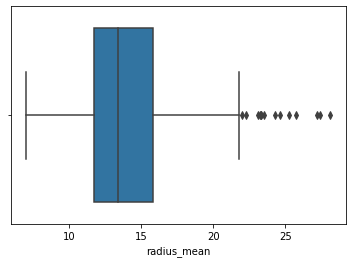

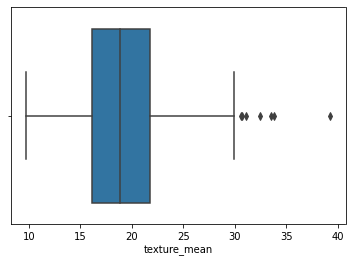

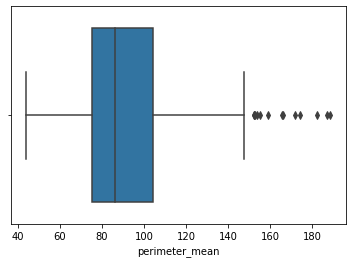

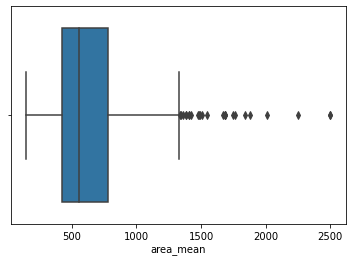

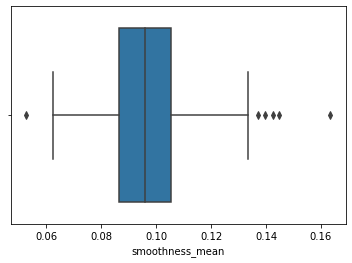

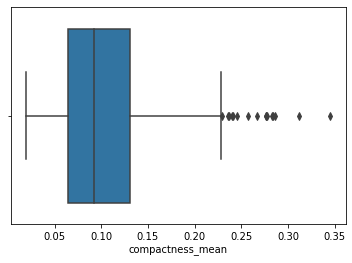

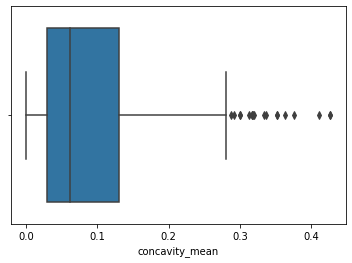

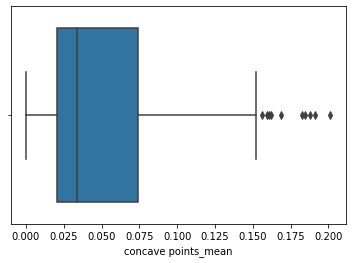

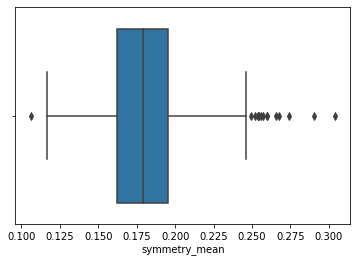

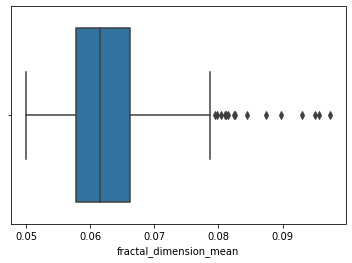

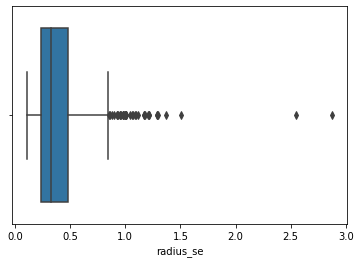

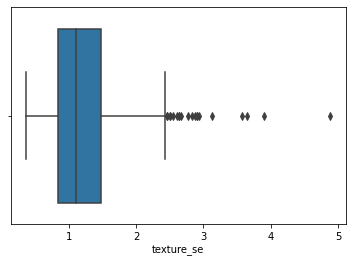

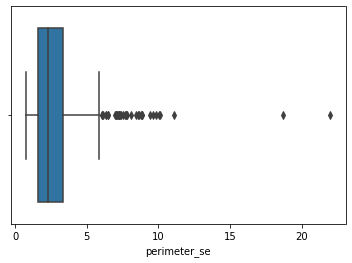

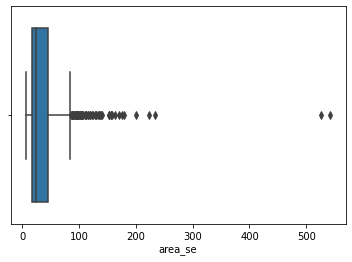

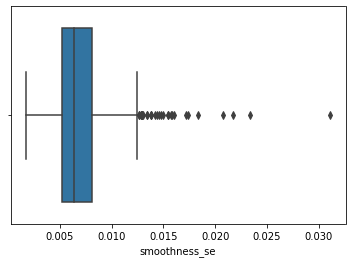

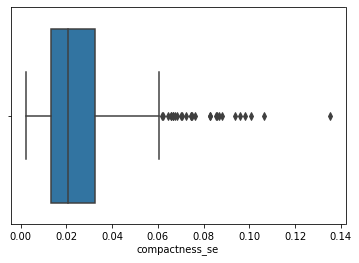

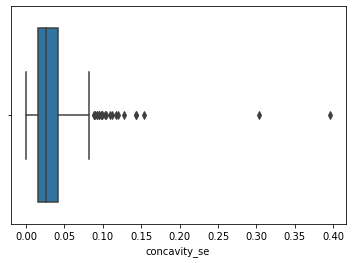

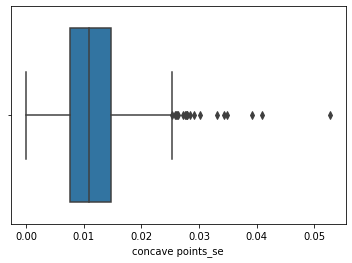

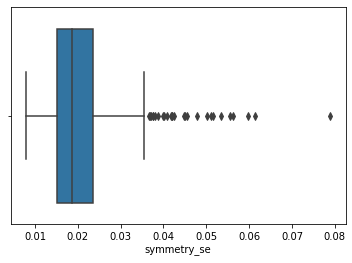

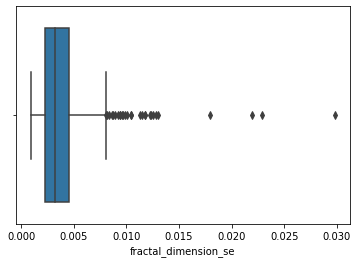

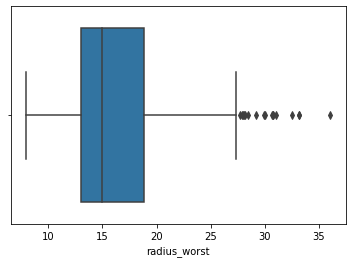

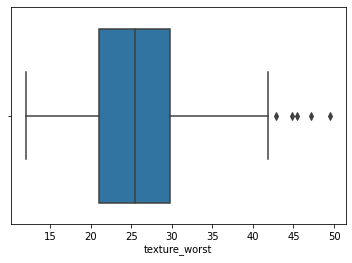

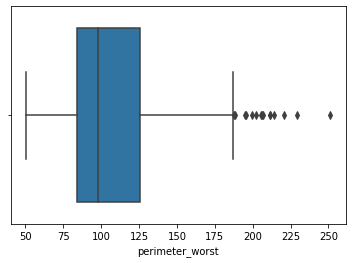

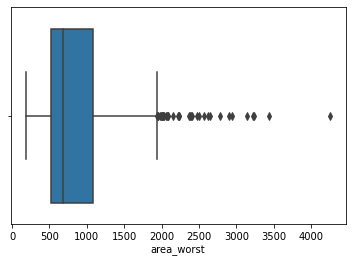

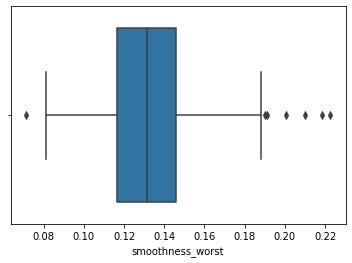

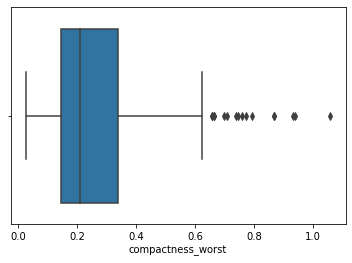

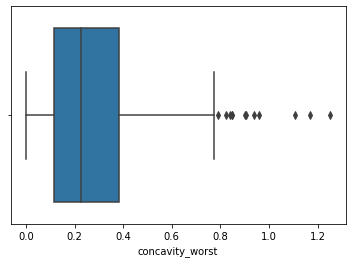

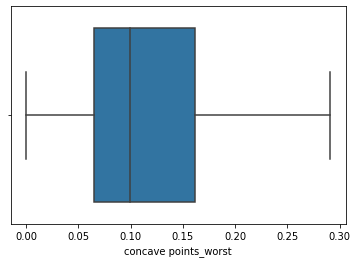

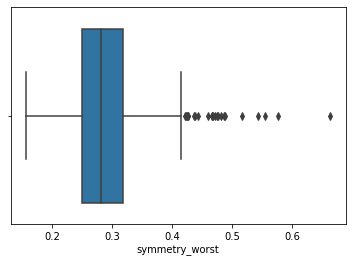

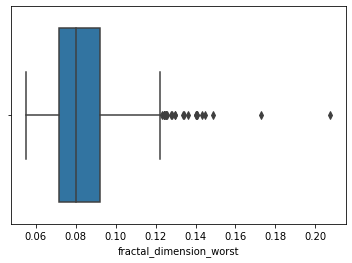

In [19]:
#Checking any outliers are present
for i in cols:
  sns.boxplot(df2[i])
  plt.show()

In [20]:
# Function that removes outliers
def outliers(data,cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)
        data[col]=np.where(data[col]> Up,Up,np.where(data[col]<Low,Low,data[col]))
#It removes the outliers

In [21]:
#calling function to remove outliers
outliers(df2,cols)

In [22]:
#To check whether any outliers are present
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum() 

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

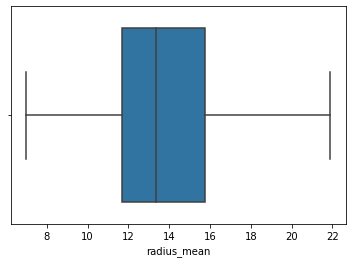

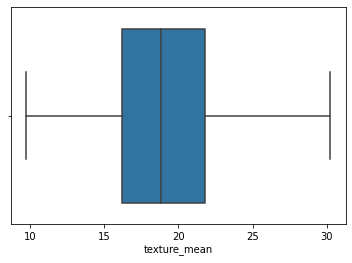

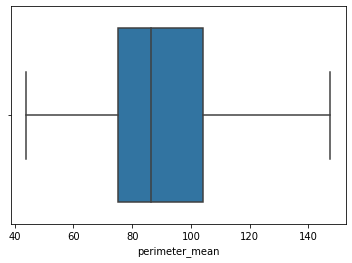

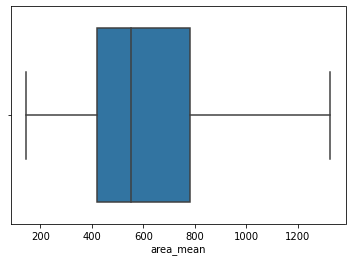

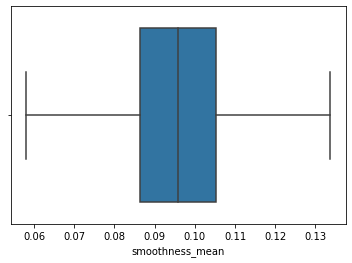

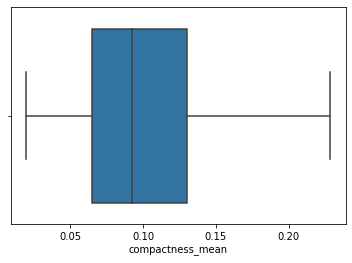

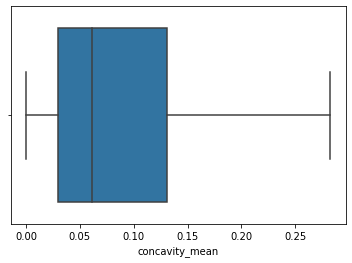

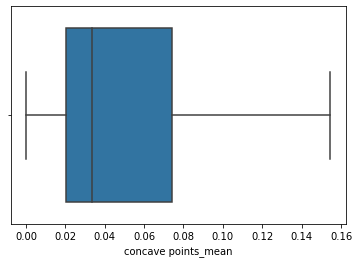

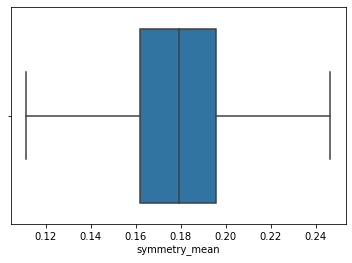

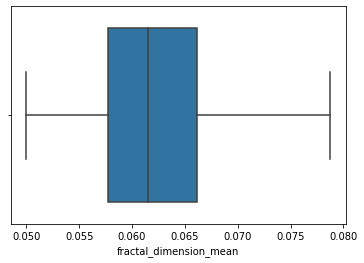

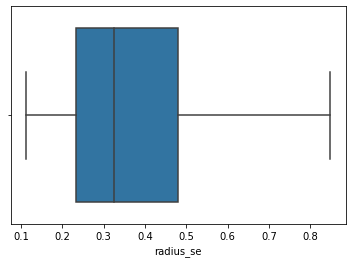

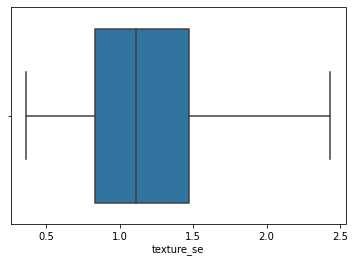

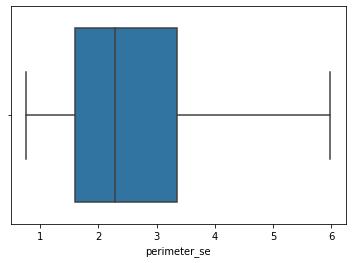

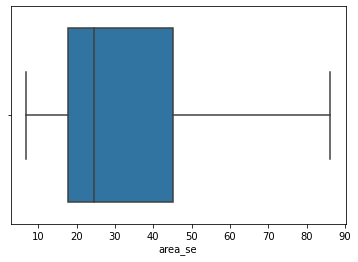

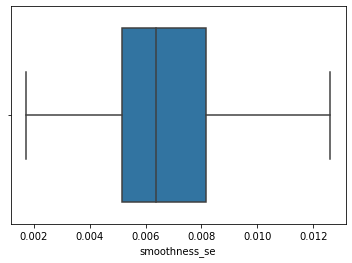

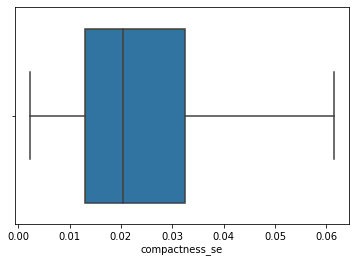

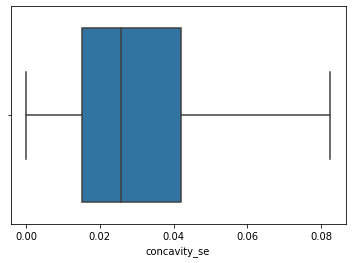

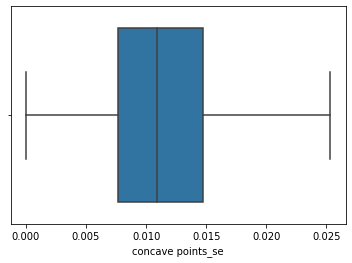

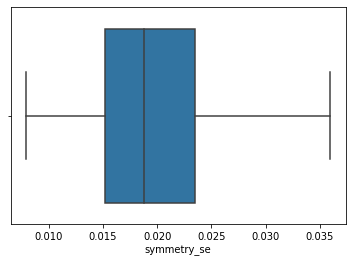

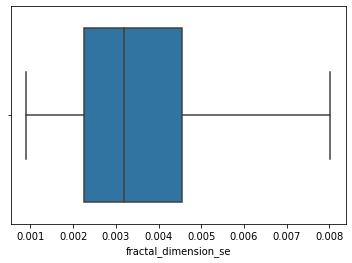

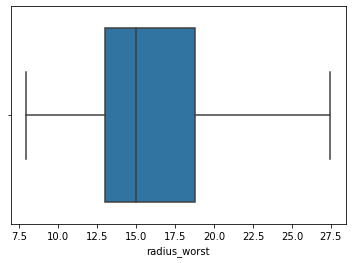

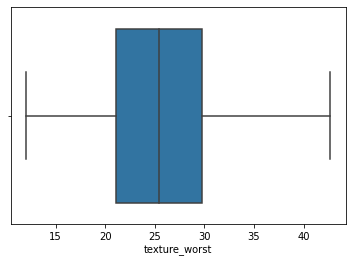

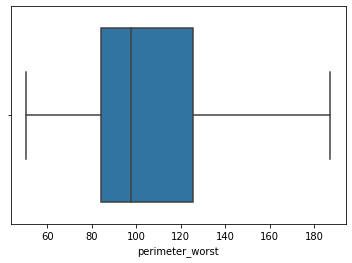

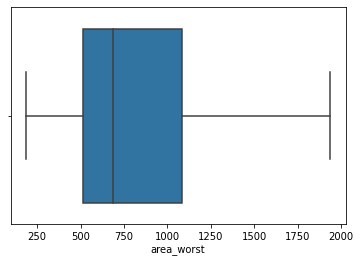

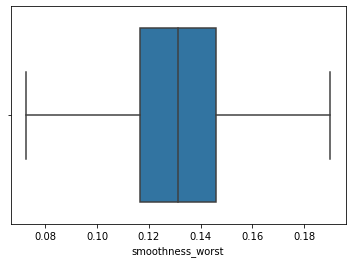

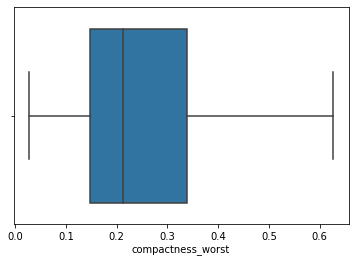

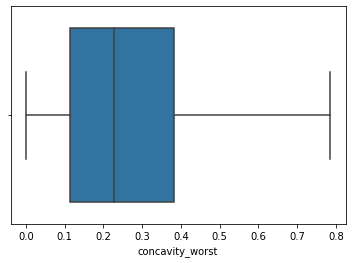

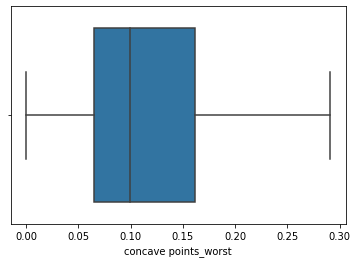

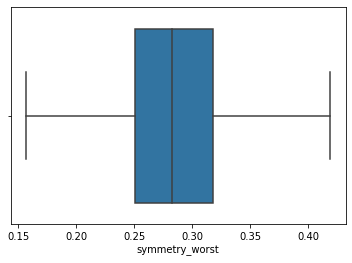

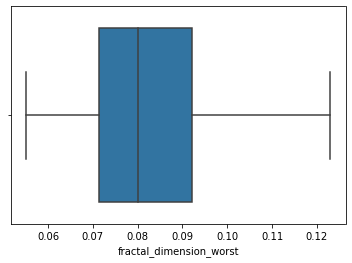

In [23]:
for i in cols:
  sns.boxplot(df2[i])
  plt.show()

**Standardising**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
df3=df2.copy()

In [26]:
df3.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [27]:
df3.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [28]:
num_cols=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [29]:
#Standardising dataset to get better model
for i in num_cols:
  scale = StandardScaler().fit(df3[[i]])
  df3[i] = scale.transform(df3[[i]])

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**VISUALIZATION**

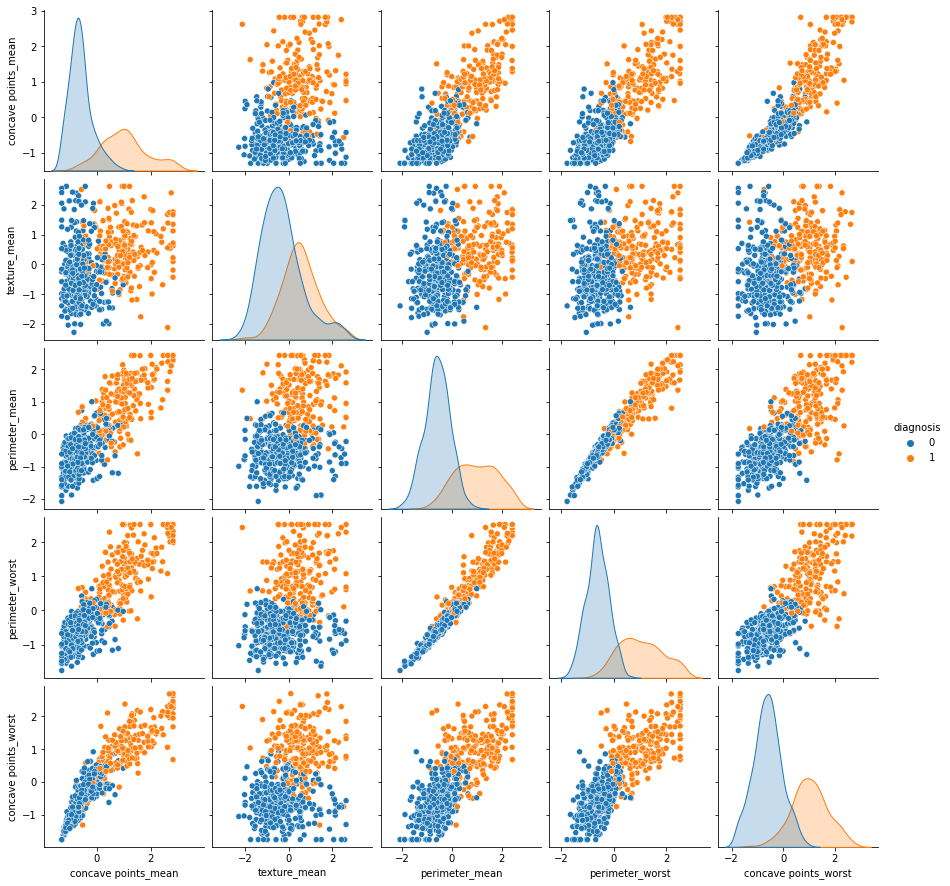

In [31]:
sns.pairplot(df3, hue="diagnosis", vars=["concave points_mean", "texture_mean", "perimeter_mean", "perimeter_worst", "concave points_worst"])
plt.show()

**Through scatter plot we find that cancer patients are situated above the normal people in each cases. It makes easier for the model to predict.**


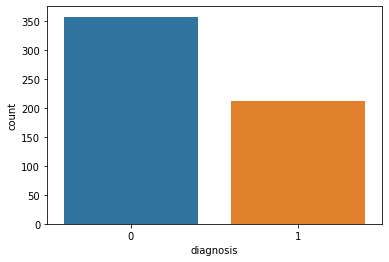

In [32]:
sns.countplot(df3['diagnosis'])     # It shows number of people affected by breast cancer.

In [33]:
df3.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.745217,0.419123,0.759006,0.752786,0.366931,0.608494,0.727168,0.788099,0.334536,...,0.793938,0.457663,0.800618,0.794640,0.423390,0.611083,0.683565,0.793566,0.419058,0.328719
radius_mean,0.745217,1.000000,0.332760,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,...,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799
texture_mean,0.419123,0.332760,1.000000,0.339588,0.341552,-0.015997,0.241666,0.318654,0.301509,0.079586,...,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049
perimeter_mean,0.759006,0.997692,0.339588,1.000000,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,...,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825
area_mean,0.752786,0.993891,0.341552,0.991861,1.000000,0.167400,0.498665,0.680126,0.814133,0.155152,...,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012
smoothness_mean,0.366931,0.167672,-0.015997,0.204990,0.167400,1.000000,0.661938,0.526544,0.560961,0.557597,...,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675
compactness_mean,0.608494,0.502741,0.241666,0.553698,0.498665,0.661938,1.000000,0.889882,0.832541,0.588842,...,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169
concavity_mean,0.727168,0.674539,0.318654,0.714624,0.680126,0.526544,0.889882,1.000000,0.928382,0.489029,...,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332
concave points_mean,0.788099,0.811833,0.301509,0.841871,0.814133,0.560961,0.832541,0.928382,1.000000,0.460386,...,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626
symmetry_mean,0.334536,0.146763,0.079586,0.181325,0.155152,0.557597,0.588842,0.489029,0.460386,1.000000,...,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494


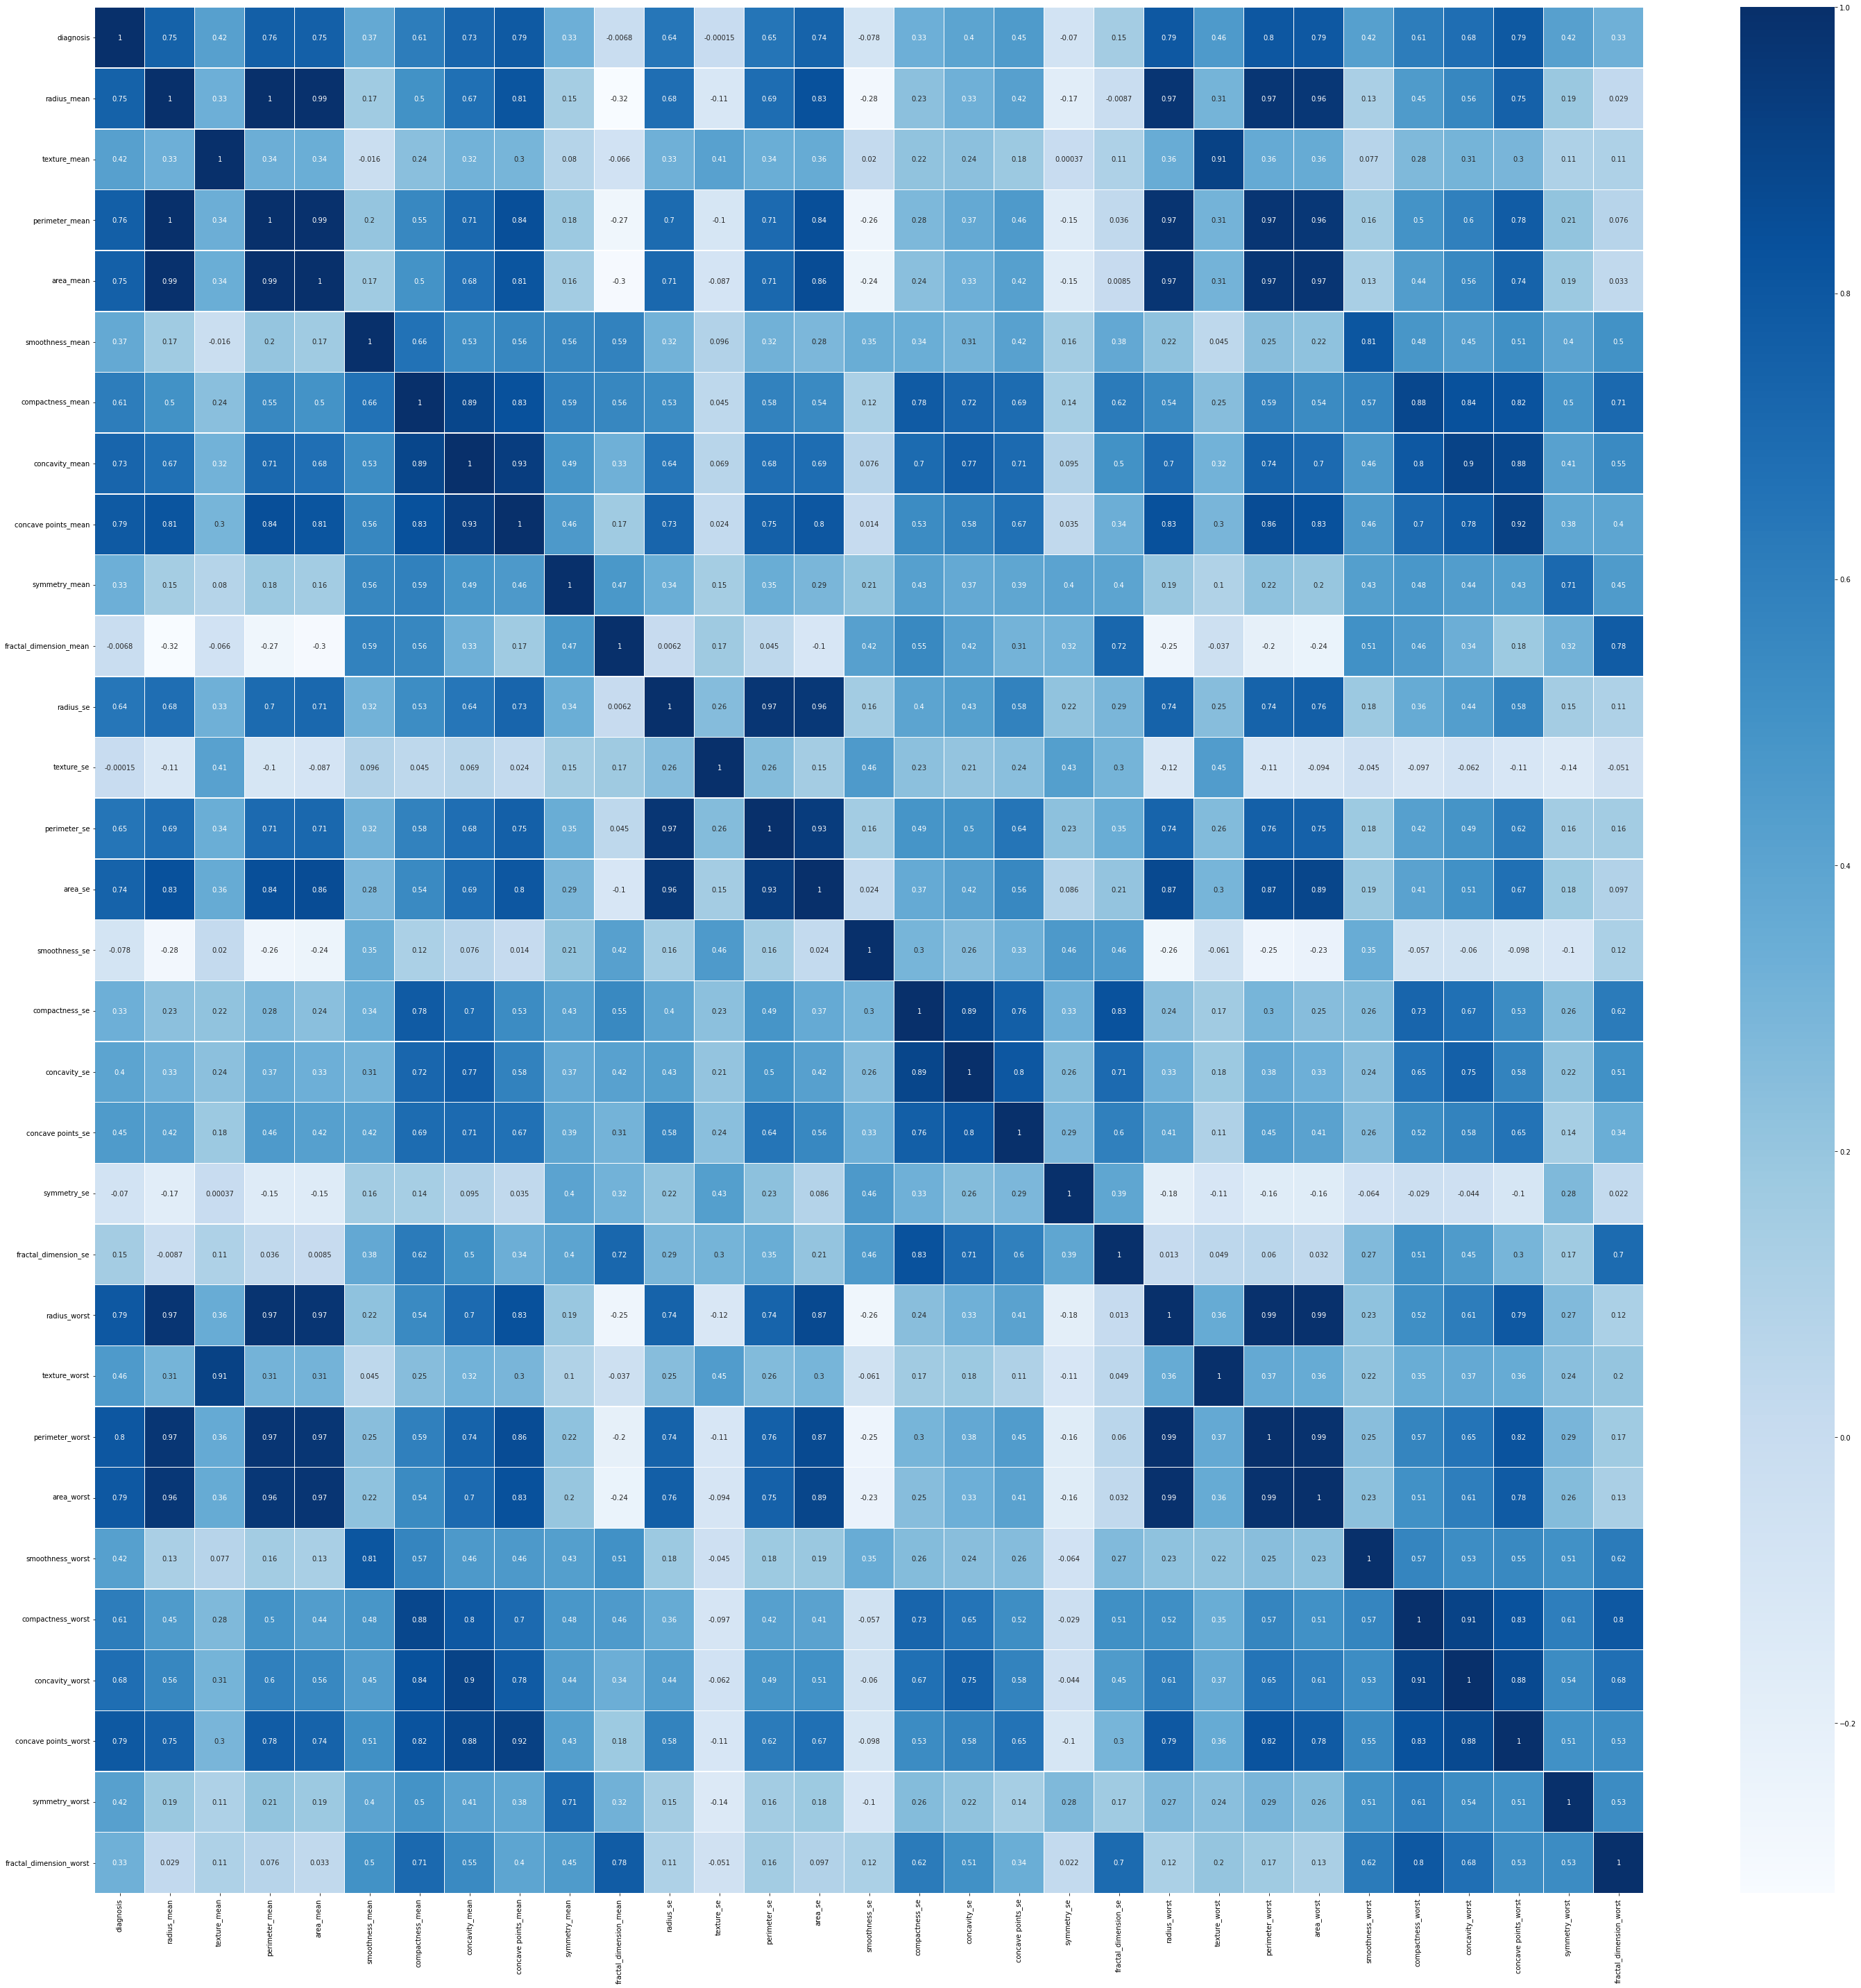

In [34]:
#To show the correlation between each columns.
fig, ax = plt.subplots(figsize=(50,50))       
sns.heatmap(df3.corr(),cmap='Blues',annot=True,linewidth=0.5,ax=ax)

**Splitting dataset into training set and testing set**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train, test = train_test_split(df3, test_size = 0.2,shuffle=True,random_state=42)

In [37]:
#training set
x_train=train.iloc[:,1:]
y_train=train.iloc[:,:1]

In [38]:
#testing set
x_test=test.iloc[:,1:]
y_test=test.iloc[:,:1]

**Model**

In [39]:
from sklearn.svm import SVC

In [40]:
#SVC model
model = SVC()
model.fit(x_train, y_train)


SVC()

In [41]:
y_predict=model.predict(x_test)

In [42]:
#To check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(x_test))

0.9736842105263158

In [43]:
accuracy_score(y_train,model.predict(x_train))

0.989010989010989

In [44]:
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [45]:
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
486,0
75,1
249,0
238,0


In [46]:
#Analysing Target and prediction
print('Target',' ','Prediction')
for i in range(0,114):  
  print(' ' ,y_test.iloc[i].values,'       ',y_predict[i])

Target   Prediction
  [0]         0
  [1]         1
  [1]         1
  [0]         0
  [0]         0
  [1]         1
  [1]         1
  [1]         1
  [0]         0
  [0]         0
  [0]         0
  [1]         1
  [0]         0
  [1]         1
  [0]         0
  [1]         1
  [0]         0
  [0]         0
  [0]         0
  [1]         1
  [1]         0
  [0]         0
  [1]         1
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [1]         1
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [1]         1
  [0]         0
  [1]         1
  [0]         0
  [0]         0
  [1]         1
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [1]         1
  [1]         1
  [0]         1
  [0]         0
  [0]         0
  [0]         0
  [0]         0
  [1]         1
  [1]         1
  [0]         0
  [0]         0
  [1

**Confusion matrix**

In [47]:
from sklearn.metrics import plot_confusion_matrix  #To import plot confusin matrix

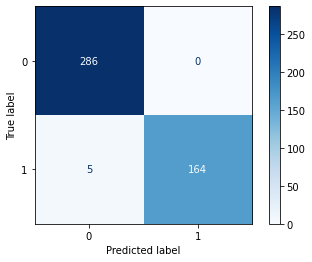

In [48]:
plot_confusion_matrix(model, x_train, y_train,cmap='Blues')  
plt.show()

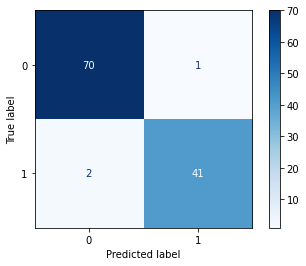

In [49]:
plot_confusion_matrix(model, x_test, y_test,cmap='Blues')  
plt.show()

**Classification Report**

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



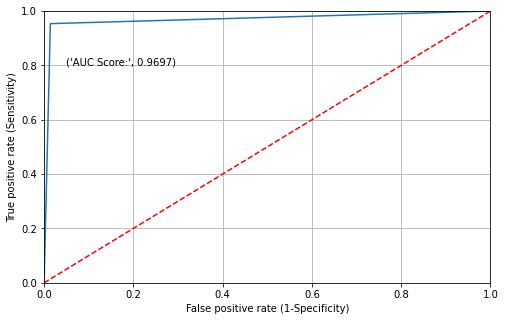

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.plot(fpr,tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')


plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_predict),4)))

plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm1 = confusion_matrix(y_test,y_predict)
total1=sum(sum(cm1))

accuracy=(cm1[0,0]+cm1[1,1])/total1

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [55]:
#To get Accuracy, Precision, Sensitivity, Specificity, AUC score.
from sklearn import metrics


cols = ['Model','Accuracy Score','Precision Score','Sensitivity','Specificity','AUC Score']


result_tabulation = pd.DataFrame(columns = cols)

summary = pd.Series({'Model': "SVM Classifier",
                      'Accuracy Score':accuracy,
                 'Precision Score': metrics.precision_score(y_test, y_predict),
                 'Sensitivity':sensitivity,
                 'Specificity': specificity,
                 'AUC Score' : metrics.roc_auc_score(y_test, y_predict)
                 })




result = result_tabulation.append(summary,ignore_index=True)

result

,Model,Accuracy Score,Precision Score,Sensitivity,Specificity,AUC Score
0,SVM Classifier,0.973684,0.97619,0.985915,0.953488,0.969702


**We get better accuracy up to 97%. Let's try to improve the model through tuning.**

**GridSearchCV Tuning**

In [56]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

In [57]:
c_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 0.01, 0.001, 0.0001]
kernels = ['rbf', 'sigmoid']
param_grid = {'C': c_values, 'gamma': gamma_values, 'kernel': kernels}

In [58]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [59]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.989 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.923 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.956 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.945 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.934 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}

In [61]:
grid.best_estimator_

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [62]:
tune=SVC(C= 100, gamma= 0.001, kernel= 'sigmoid')

In [63]:
tuned_model=tune.fit(x_train,y_train)

In [64]:
y_pred_tuned=tuned_model.predict(x_test)

In [65]:
accuracy_score(y_train,tuned_model.predict(x_train))

0.9846153846153847

In [66]:
accuracy_score(y_test,tuned_model.predict(x_test))

0.9824561403508771

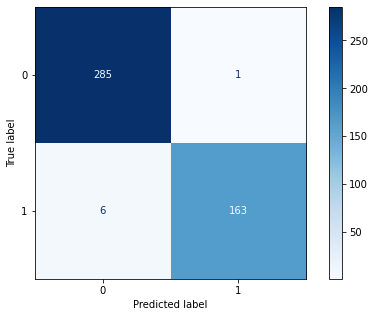

In [67]:
plot_confusion_matrix(tune, x_train, y_train,cmap='Blues')  
plt.show()

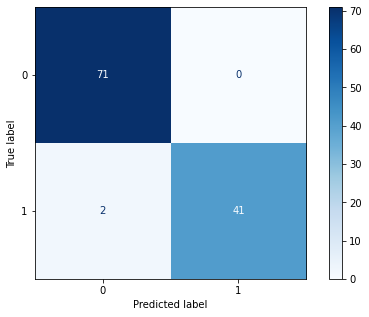

In [68]:
plot_confusion_matrix(tune, x_test, y_test,cmap='Blues')  
plt.show()

In [69]:
cm2 = confusion_matrix(y_test,y_pred_tuned)
total2=sum(sum(cm2))

accuracy2=(cm2[0,0]+cm2[1,1])/total2

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])

In [70]:
cols = ['Model','Accuracy Score','Precision Score','Sensitivity','Specificity','AUC Score']


result_tabulation = pd.DataFrame(columns = cols)

summary = pd.Series({'Model': "SVM Classifier",
                      'Accuracy Score':accuracy2,
                 'Precision Score': metrics.precision_score(y_test, y_pred_tuned), 
                 'Sensitivity':sensitivity2,
                 'Specificity': specificity2,
                 'AUC Score' : metrics.roc_auc_score(y_test, y_pred_tuned)
                 })




result = result_tabulation.append(summary,ignore_index=True)

result

,Model,Accuracy Score,Precision Score,Sensitivity,Specificity,AUC Score
0,SVM Classifier,0.982456,1.0,1.0,0.953488,0.976744


**Here, we get a improved version while checking with test set. The accuracy here is approximately 98%.**

**Finally, we get a better model by tuning the hyperparameters.**